In [94]:
def contact_angle(name):
    import csv
    from numpy import genfromtxt
    import matplotlib.pyplot as plt
    fd = genfromtxt('../ContactAngle/{}.csv'.format(name), delimiter='\t')
    x = []
    y = []
    for i in range(len(fd)):
        x.append(fd[i][0])
        y.append(fd[i][1])
    # only fit data in certain range
    x1,y1 = [],[]

    for i in range(len(x)):
        x1.append(x[i])
        y1.append(y[i])

    # 3rd-order polynomial fitting
    z1 = np.polyfit(x1, y1, 3)
    p1 = np.poly1d(z1)

    xp1 = np.linspace(0, 13, 1000)
    maxpH = 0
    for i in range(len(xp1)):
        if p1(xp1[i]) >= p1(maxpH):
            maxpH = xp1[i]
    maxAn = p1(maxpH)
    print('max pH value: {:.4f}'.format(maxpH), 'max angle: {:.4f}'.format(maxAn))
    
    fig, ax = plt.subplots(figsize=(30, 8))
    plt.subplot(1,3,1)
    _ = plt.plot(xp1, p1(xp1), '-')
    plt.scatter(x,y)
    plt.xlabel('pH_value')
    plt.ylabel('contact angle')
    
    # surface potential part
    
    r = 0.07199 # N/m
    d = 0.9*10**(-9) # debye length in 0.1M KCl
    k = 1.38 *10**(-23) # J/K
    T = 298 # Kelvin
    e0 = 8.85 * 10**(-12) # F/m
    er = 80
    e = 1.6*10**(-19) # C
    z = 1 # valency
    a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand
    y = np.array(y)
    left = np.cos(y * np.pi / 180.)-np.cos(maxAn* np.pi / 180.)
    left = np.array(left)
    left = np.maximum(0, left)
    right = np.arccosh(r*left/a+1) # second term + 1
    fi = right*2*k*T/(z*e) # surface potential
    sigma = 2*k*T*e0*er*np.sinh(z*e*fi/(2*k*T))/(z*e*d)
    plt.subplot(1,3,2)
    plt.scatter(x, fi*1000)
    plt.xlim(0.5,13)
    plt.ylim(-10, 300)
    plt.xlabel('pH_value')
    plt.ylabel('Surface potential (mV)')

    # surface charge part
    plt.subplot(1,3,3)
    plt.scatter(x, sigma)
    plt.xlim(0.5,13)
    plt.ylim(-0.1, 1)
    plt.xlabel('pH_value')
    plt.ylabel('Surface charge density (C/m^2)')
    plt.savefig("{}_charge.png".format(name))
    
    return maxAn

max pH value: 6.0641 max angle: 65.2300


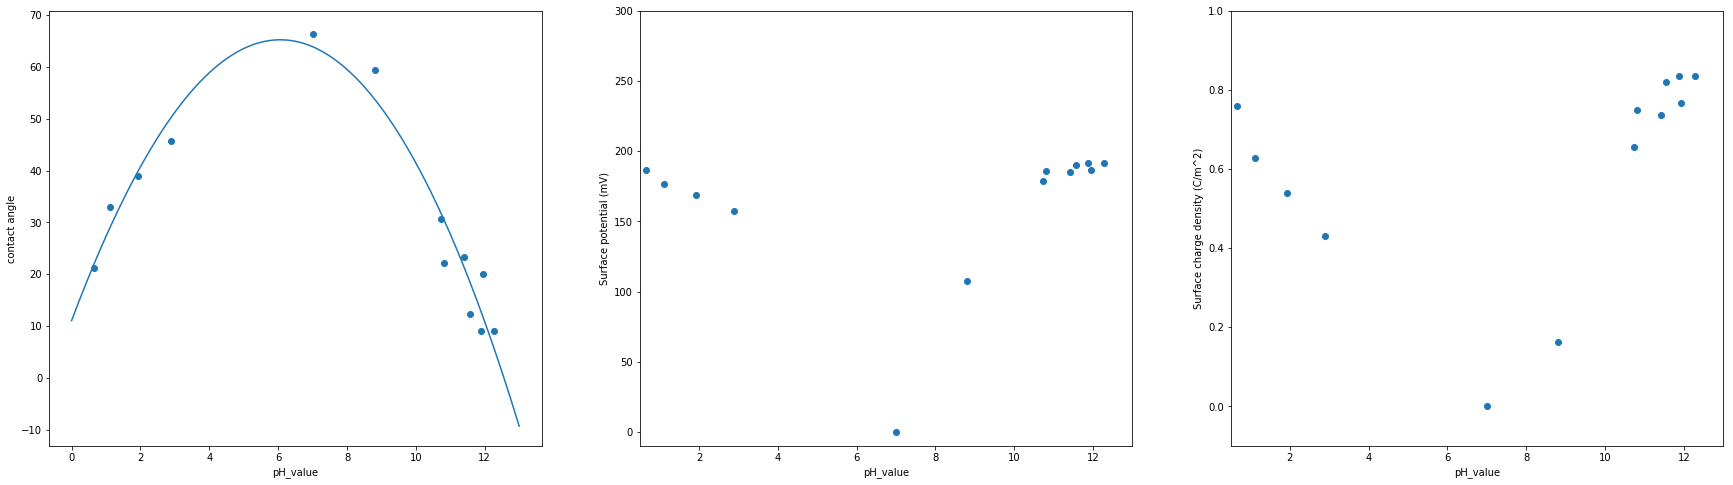

In [95]:
maxAng = contact_angle('fW')

max pH value: 6.4675 max angle: 79.8445


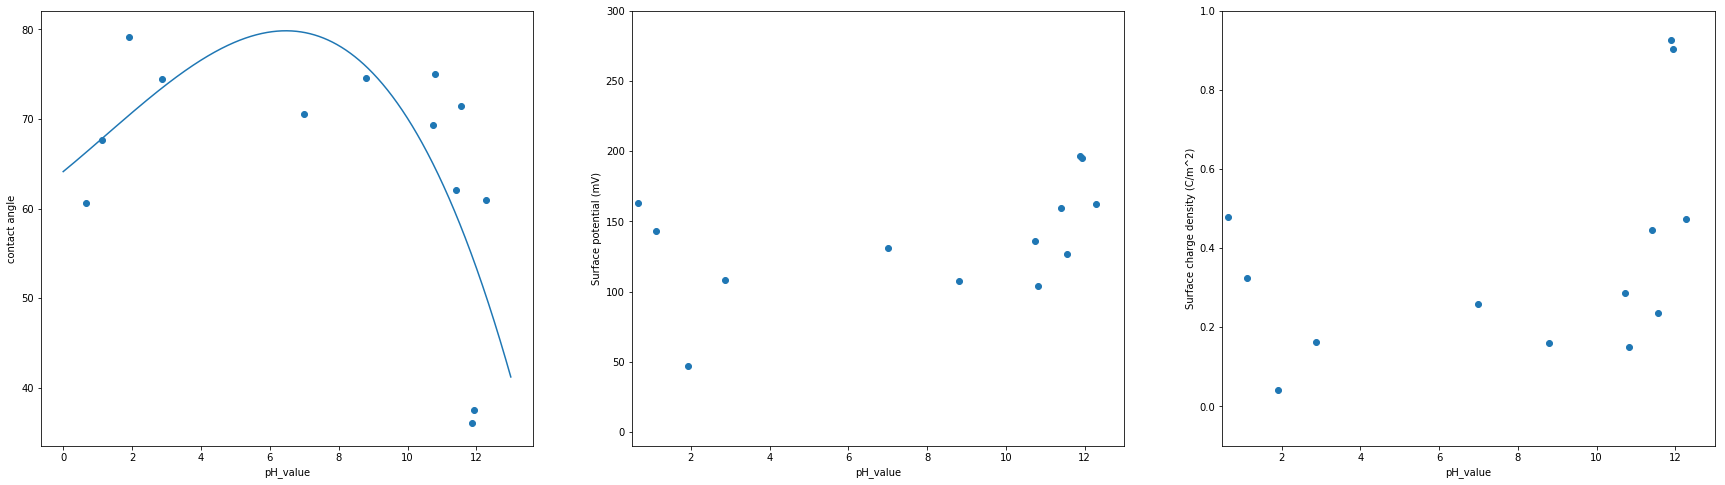

In [96]:
maxAng = contact_angle('mW')

max pH value: 6.4935 max angle: 65.8912


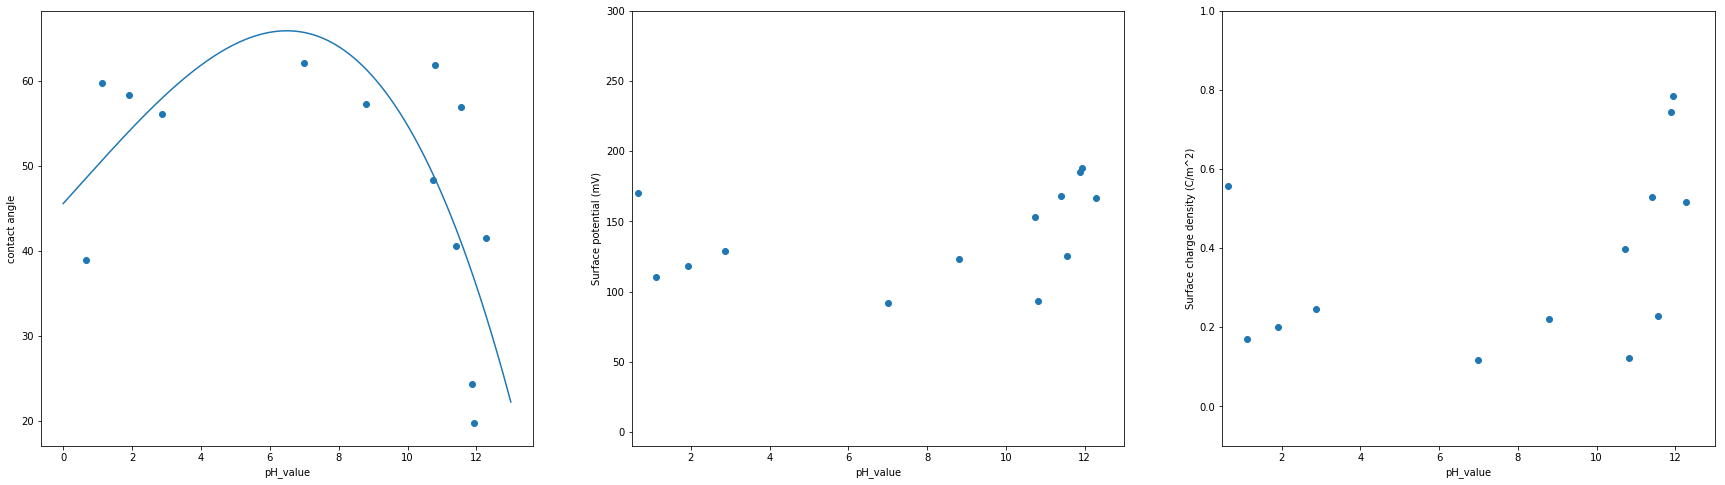

In [97]:
maxAng = contact_angle('Pt')